# Librerias

In [78]:
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import missingno

In [79]:
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context(context='notebook')
sns.set_theme(style="darkgrid")
color="spring_r"
plt.rcParams['figure.figsize'] = (13, 8)

In [80]:
%run datex.ipynb

/tmp/ipykernel_11626/1444193951.py:2: UserWarning: registration of accessor <class '__main__.DontMissMe'> under name 'datex' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class DontMissMe:


# datos

In [81]:
survival_df = sm.datasets.get_rdataset("flchain", "survival").data

In [82]:
survival_df.datex.category_per_variable("sex")

,value
0,F
1,M


## Clasificacion 

In [83]:
survival_df.dtypes

age             int64
sex            object
sample.yr       int64
kappa         float64
lambda        float64
flc.grp         int64
creatinine    float64
mgus            int64
futime          int64
death           int64
chapter        object
dtype: object

In [84]:
survival_df.dtypes.value_counts()

int64      6
float64    3
object     2
dtype: int64

In [85]:
pd.DataFrame(survival_df.columns)

,0
0,age
1,sex
2,sample.yr
3,kappa
4,lambda
5,flc.grp
6,creatinine
7,mgus
8,futime
9,death


In [86]:
print(survival_df.size,survival_df.shape)

86614 (7874, 11)


## Datos nulos

In [87]:
survival_df.datex.table_data_exp()

,Data,value
0,total_data,86614.000000
1,total_nulls,7055.000000
2,total_no_null,79559.000000
3,%_null,8.145334
4,max_null/case,2.000000


*un total de 8,14% de datos nulos y un maximo de 2 valores nulos por caso*

In [88]:
survival_df.datex.percentage_null_variable()

,variable,null,percentage
0,age,0,0.000000
1,sex,0,0.000000
2,sample.yr,0,0.000000
3,kappa,0,0.000000
4,lambda,0,0.000000
5,flc.grp,0,0.000000
6,creatinine,1350,17.145034
7,mgus,0,0.000000
8,futime,0,0.000000
9,death,0,0.000000


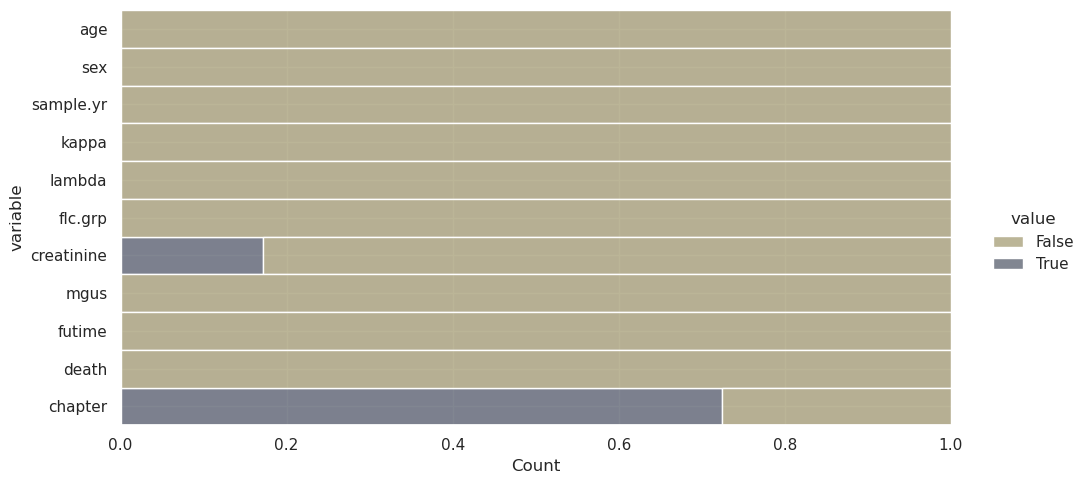

In [89]:
survival_df.datex.proportion_null_data()

*la variables "chapter" tiene el mayor numero de valores nulos con 72,4% seguido por "creatine" con 17.4%*

<AxesSubplot:>

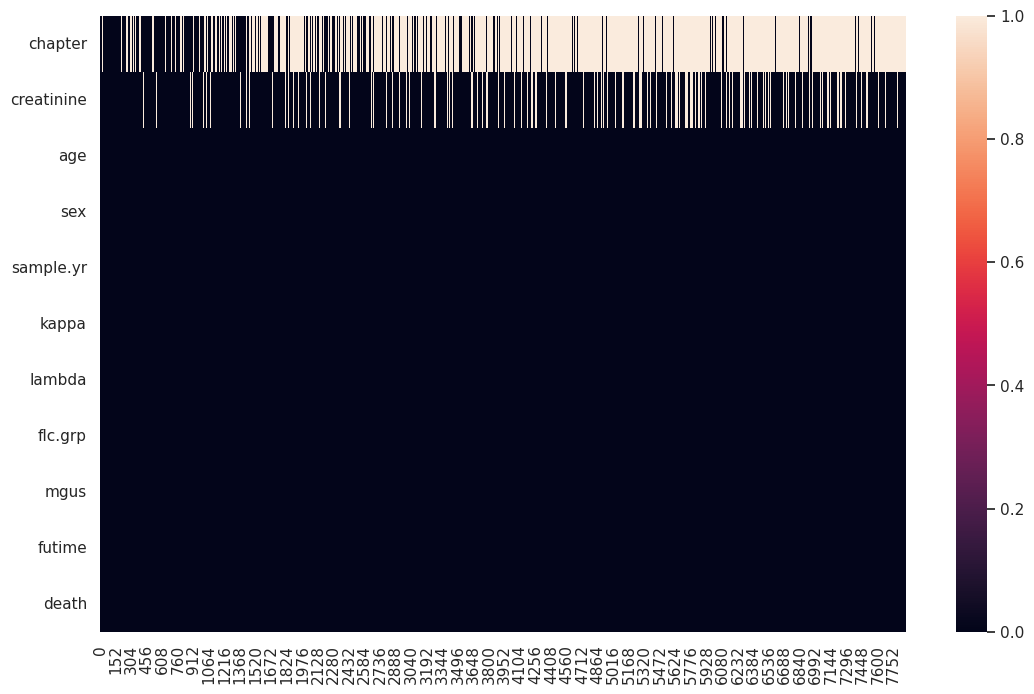

In [90]:
survival_df.datex.null_per_variable_plot()

<AxesSubplot:>

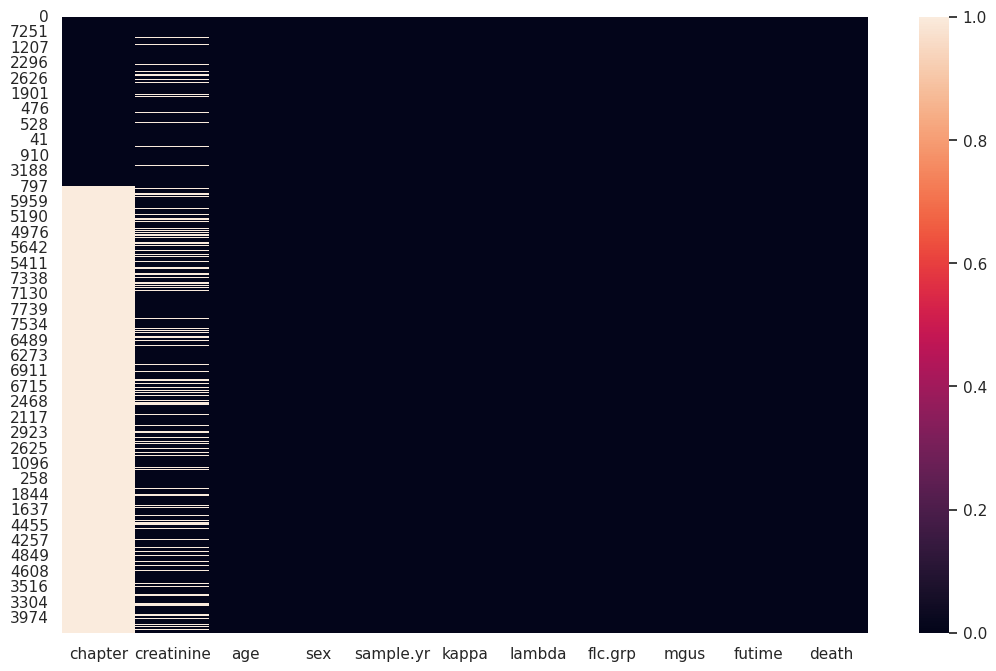

In [91]:
survival_df.datex.sort_null_per_variable_plot("chapter")

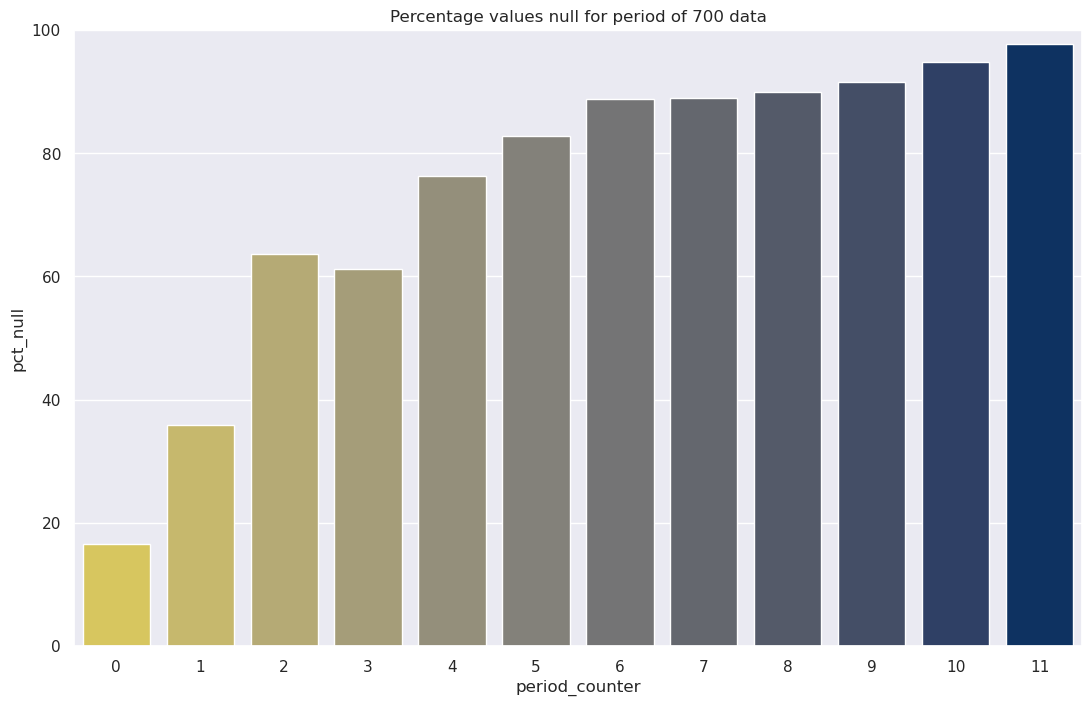

In [92]:
survival_df.datex.null_for_period_plot("chapter",700)

/tmp/ipykernel_11626/1444193951.py:173: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


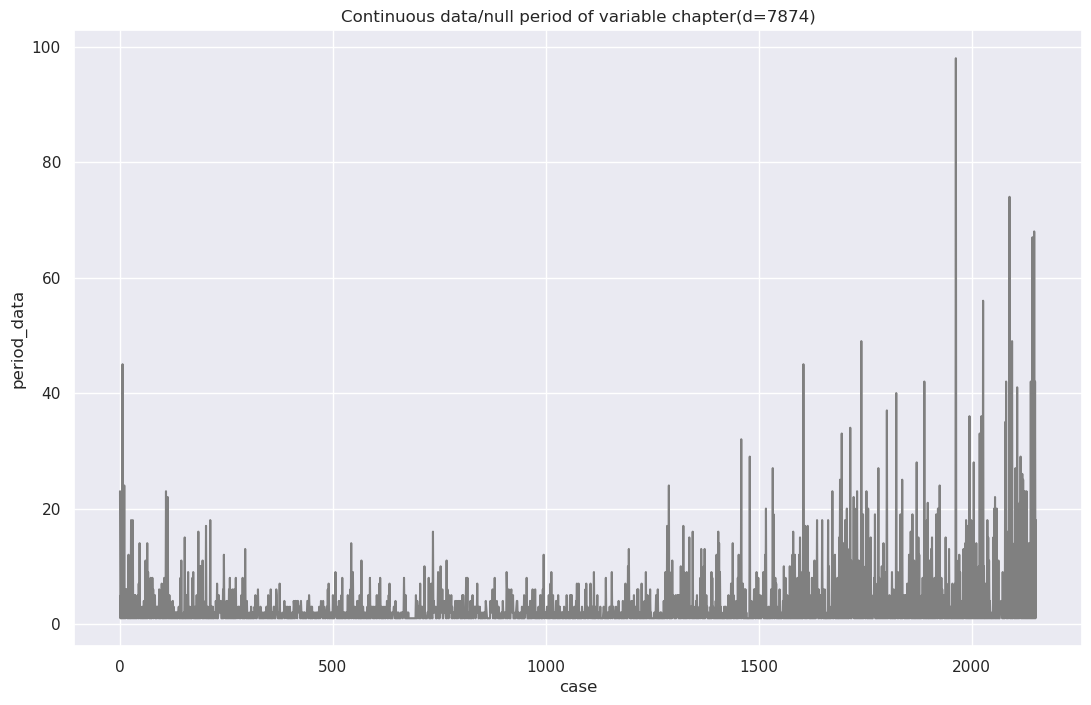

In [93]:
survival_df.datex.continuous_data_period_plot("chapter")

*no se ven patrones en el comportamiento temporal de los valores nulos ni relacion entre ellos*

<AxesSubplot:>

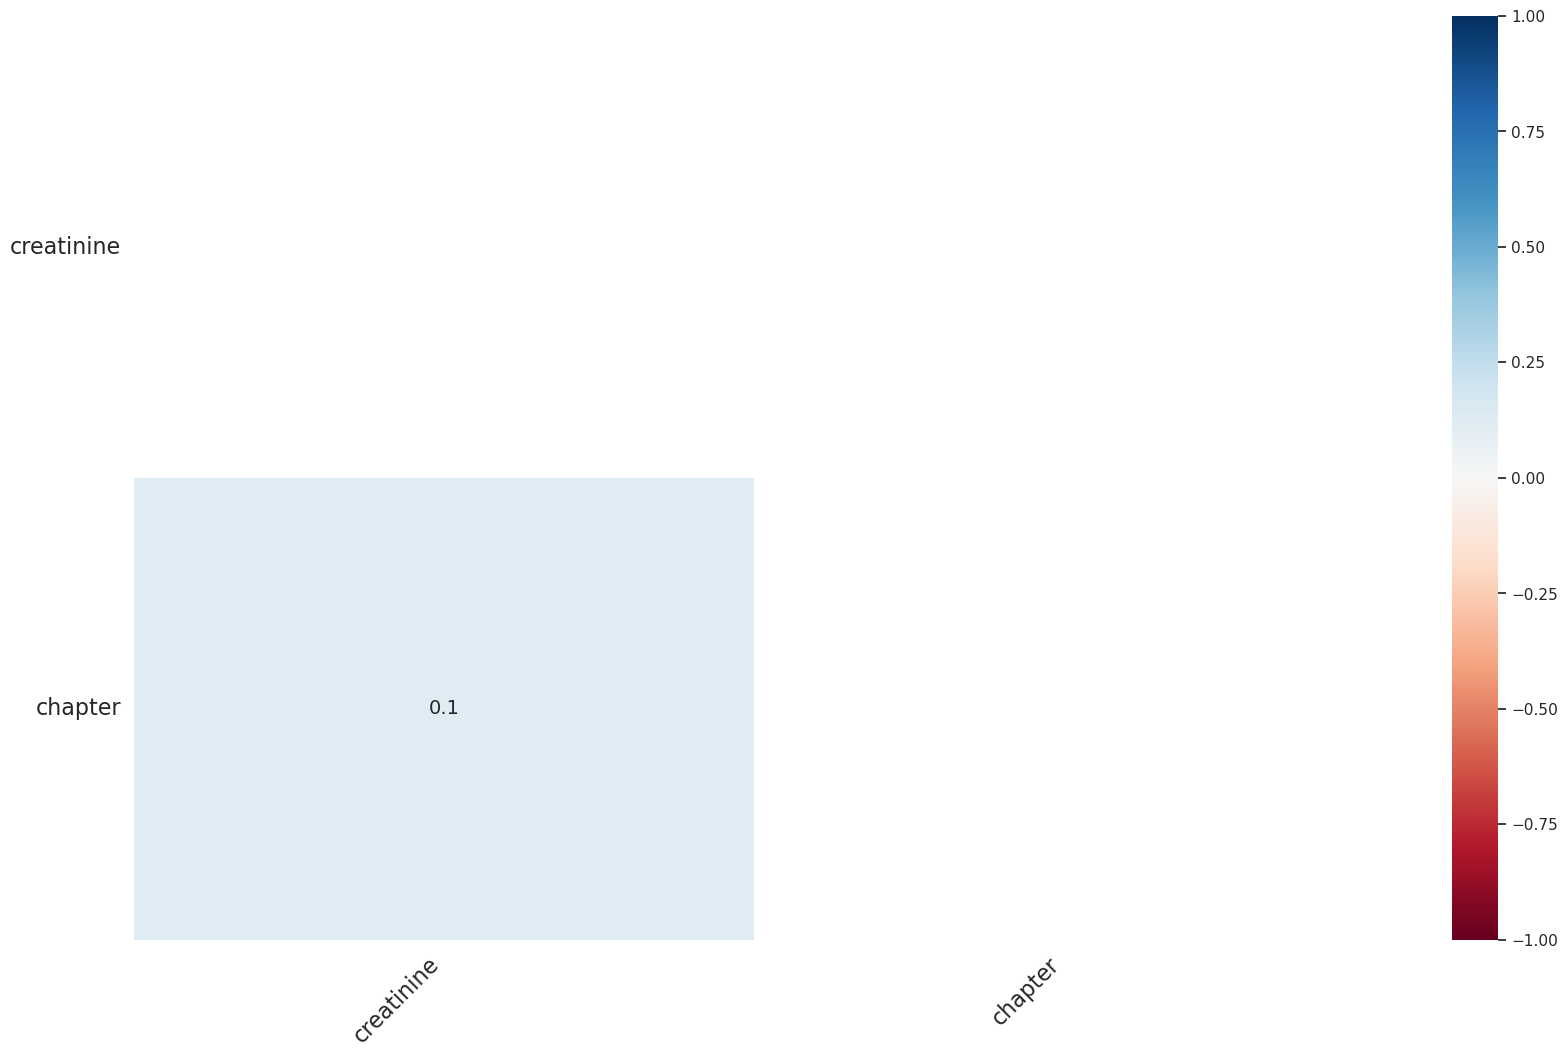

In [94]:
missingno.heatmap(df=survival_df)

*no hay correlacion entre las variables con datos faltantes*

### datos implicitos

In [95]:
survival_df.ffill()

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.1,0,1039,1,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...
7869,52,F,1995,1.210,1.610,6,1.0,0,4997,0,Neoplasms
7870,52,F,1999,0.858,0.581,1,0.8,0,3652,0,Neoplasms
7871,54,F,2002,1.700,1.720,8,0.8,0,2507,0,Neoplasms
7872,53,F,1995,1.710,2.690,9,0.8,0,4982,0,Neoplasms


In [96]:
survival_df.shape

(7874, 11)

In [97]:
(
    survival_df
    .value_counts(
        subset=["creatinine"]
    )
    .reset_index(name="n")
    .query("n<3")
)

,creatinine,n
23,4.9,2
24,5.0,2
25,3.2,2
26,3.7,2
27,3.4,2
28,2.9,2
29,3.0,2
30,2.7,2
31,2.6,2
32,3.1,2


## Imputacion de datos


## Visualizacion de datos

In [98]:
#sns.pairplot(survival_df, hue="death")

*hipotesis: las variedades mas relacionadas con muerte son lmbda, kappa, creatinina, futime

In [99]:
survival_df

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.1,0,1039,1,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...
7869,52,F,1995,1.210,1.610,6,1.0,0,4997,0,NaN
7870,52,F,1999,0.858,0.581,1,0.8,0,3652,0,NaN
7871,54,F,2002,1.700,1.720,8,NaN,0,2507,0,NaN
7872,53,F,1995,1.710,2.690,9,NaN,0,4982,0,NaN


<AxesSubplot:xlabel='futime', ylabel='Count'>

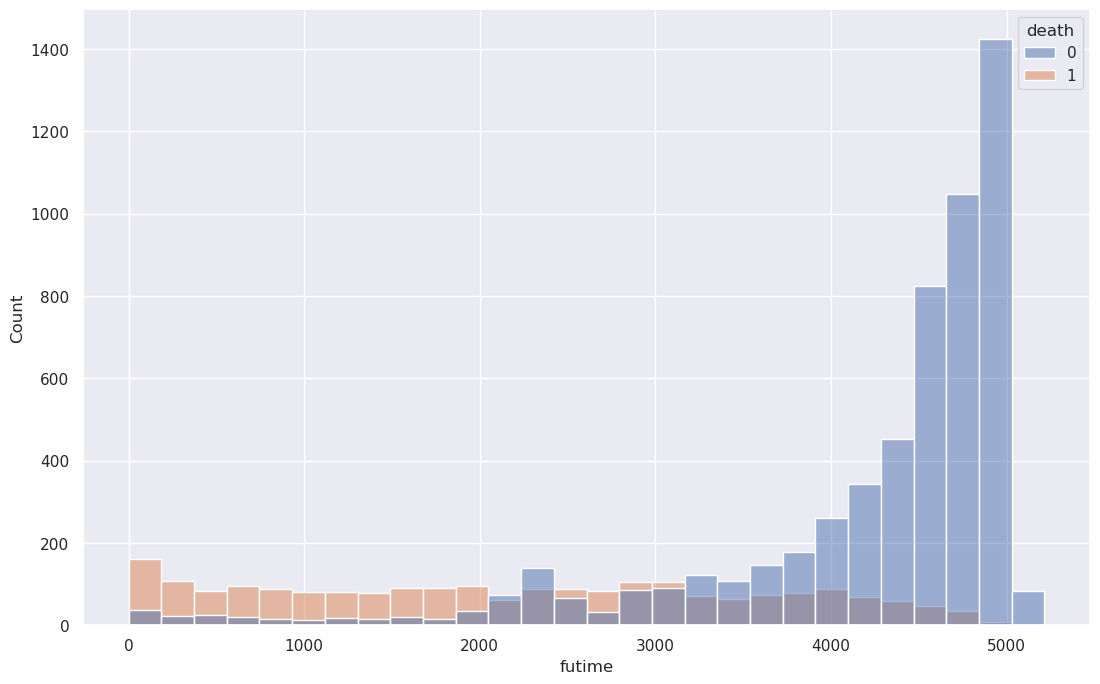

In [100]:
sns.histplot(
    data=survival_df,
    x="futime",
    hue="death"
)


*parece habe ina relacion con futime y death*

In [101]:
survival_df.columns

Index(['age', 'sex', 'sample.yr', 'kappa', 'lambda', 'flc.grp', 'creatinine',
       'mgus', 'futime', 'death', 'chapter'],
      dtype='object')

In [102]:
survival_df.datex.category_per_variable("chapter")

,value
6,NaN
12,Blood
0,Circulatory
16,Congenital
5,Digestive
13,Endocrine
8,External Causes
9,Genitourinary
10,Ill Defined
11,Infectious


<AxesSubplot:xlabel='creatinine'>

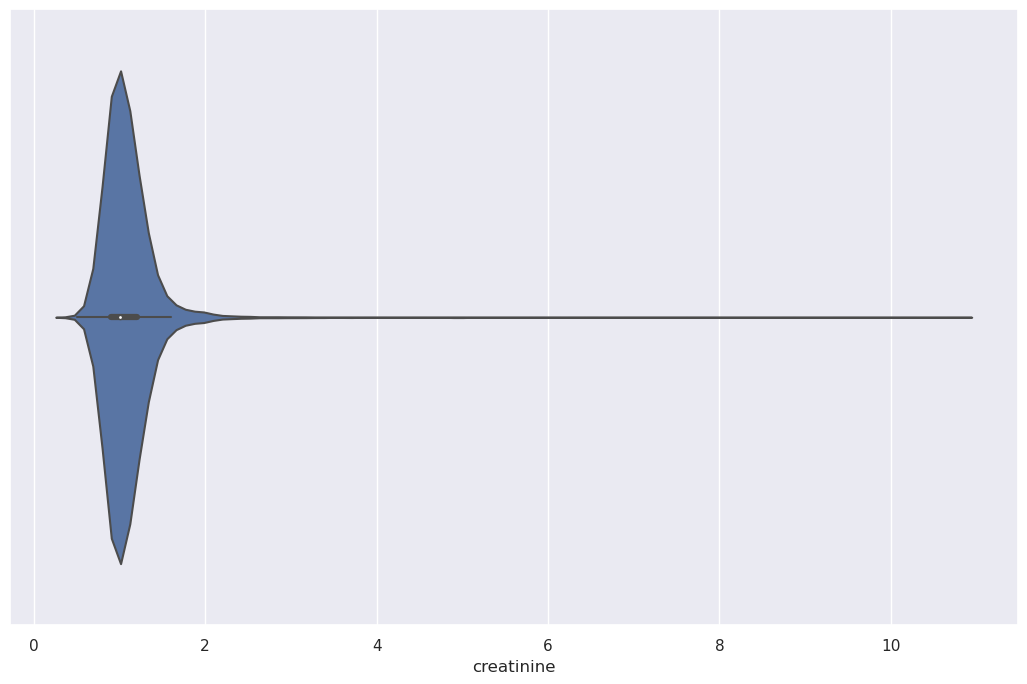

In [103]:
sns.violinplot(
    data=survival_df,
    x="creatinine",
    split=False   
)

In [104]:
survival_df_edit =   survival_df.fillna({"creatinine":survival_df.creatinine.mean()})
survival_df_edit


,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.700000,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.900000,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.400000,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.000000,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.100000,0,1039,1,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...
7869,52,F,1995,1.210,1.610,6,1.000000,0,4997,0,NaN
7870,52,F,1999,0.858,0.581,1,0.800000,0,3652,0,NaN
7871,54,F,2002,1.700,1.720,8,1.093516,0,2507,0,NaN
7872,53,F,1995,1.710,2.690,9,1.093516,0,4982,0,NaN


<AxesSubplot:xlabel='creatinine'>

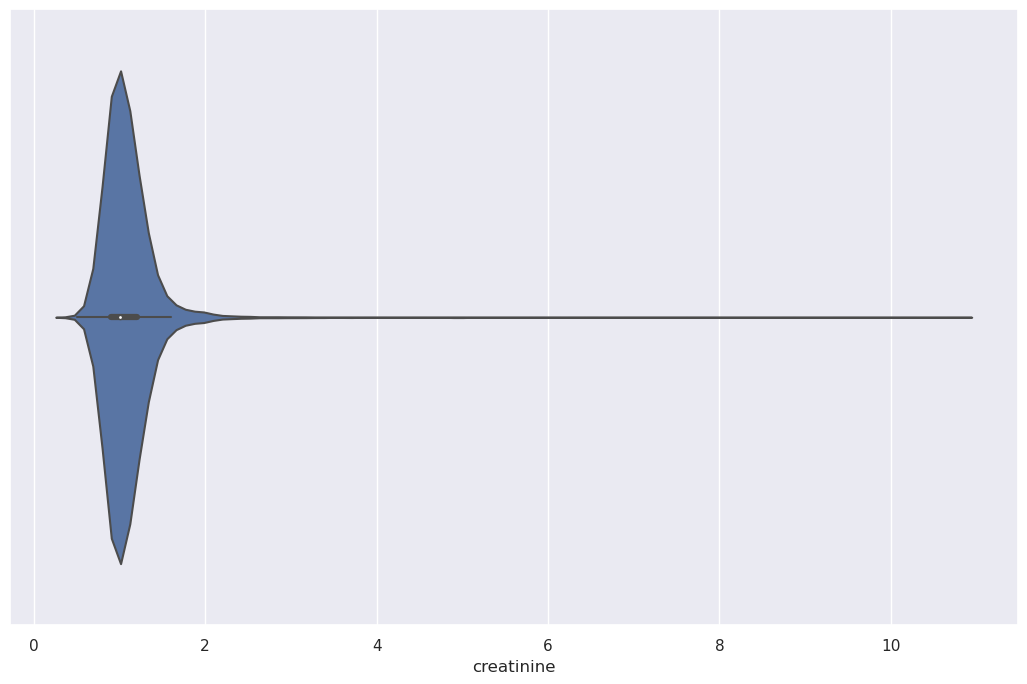

In [105]:
sns.violinplot(
    data=survival_df,
    x="creatinine",
    split=False   
)

<AxesSubplot:xlabel='creatinine', ylabel='death'>

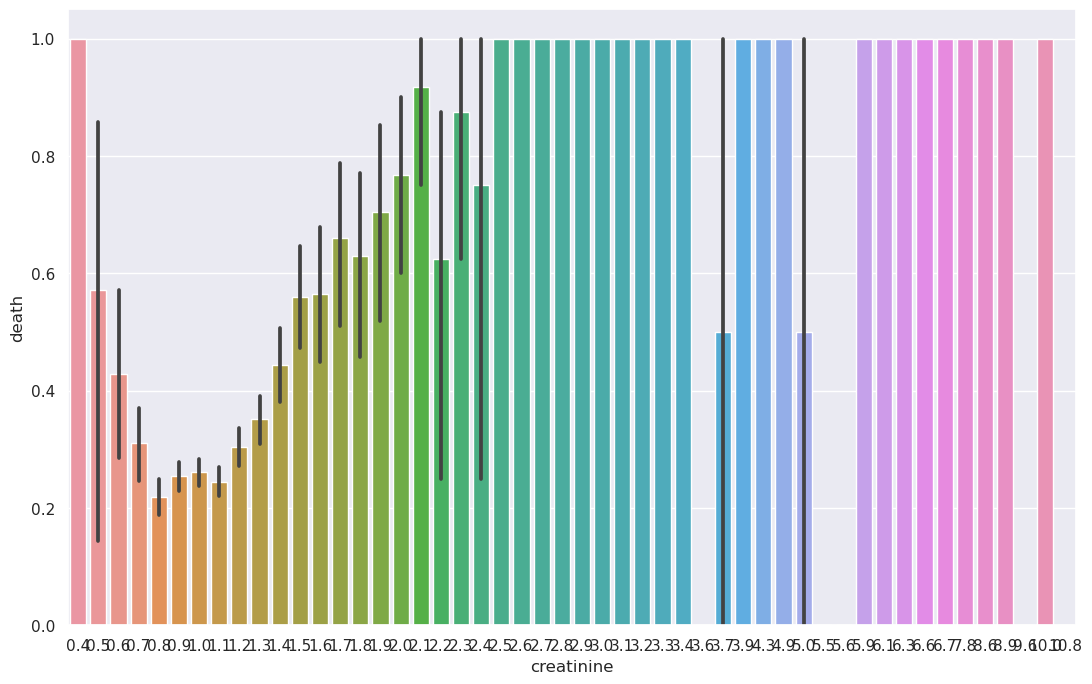

In [106]:
sns.barplot(
    data=survival_df,
    x="creatinine",
    y="death"
)

In [114]:
survival_drop_df=(
    survival_df
    .dropna(
        subset=["creatinine"],
        how="any"
    )
    .shape
)

In [112]:
smf.logit(formula = 'death ~ creatinine + futime + age',data = survival_df).fit()

Optimization terminated successfully.
         Current function value: 0.297285
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  death   No. Observations:                 6524
Model:                          Logit   Df Residuals:                     6520
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.5138
Time:                        17:30:15   Log-Likelihood:                -1939.5
converged:                       True   LL-Null:                       -3989.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1981      0.336    -15.490      0.000      -5.856      -4.540
creatinine     0.2583      0.105      2.449      0.014       0.052       0.465
futime        -0.0012   3.39e-05    -35.451      0.000      -0.001      -0.001
age            0.1229      0.005     26.611      0.000       0.114       0.132
==============================================================================
"""

In [115]:
model_death = smf.ols(
    formula = 'death ~ creatinine + futime + age ',
    data = survival_df_edit
).fit()

In [118]:
model_vs = pd.DataFrame(dict(
    model= model_death.predict(),
    death = survival_df_edit.death
    
))

/tmp/ipykernel_11626/466830572.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


<AxesSubplot:xlabel='model', ylabel='Density'>

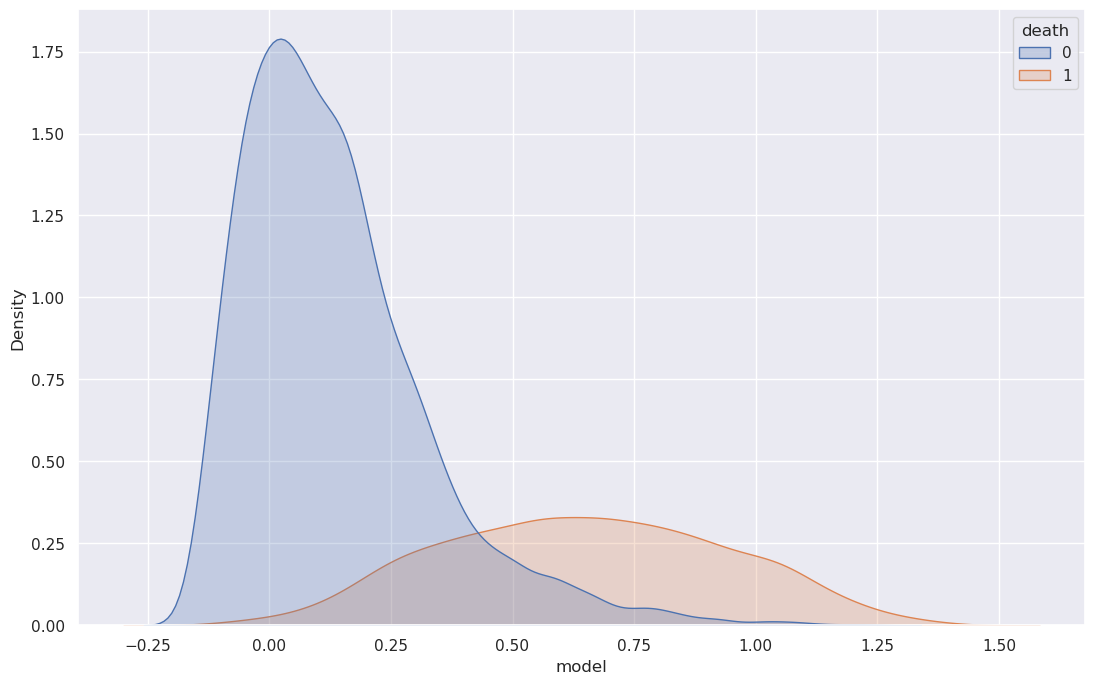

In [126]:
sns.kdeplot(
    data= model_vs,
    x="model",
    hue="death",
    shade=True

)